In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz
import mglearn

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz

In [3]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=123)

print(X.shape)
print(y.shape)

(100, 2)
(100,)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_train.shape)

(70, 2)
(70,)
(30, 2)
(70,)


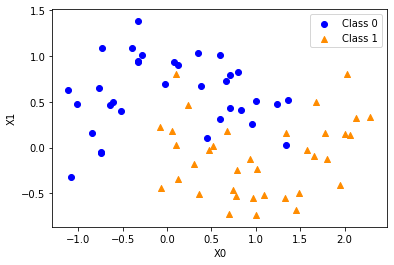

In [5]:
fig, ax = plt.subplots()

ax.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], 
           marker = 'o', c = 'blue', label = 'Class 0')

ax.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1],
           marker = '^', c = 'darkorange', label = 'Class 1')

ax.set_xlabel('X0')
ax.set_ylabel('X1')
ax.legend(loc = 'best')

plt.show()

## 1. 決定木

In [6]:
tree = DecisionTreeClassifier(max_depth = 3, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

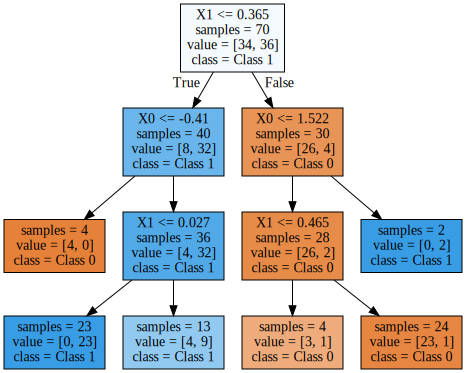

In [7]:
export_graphviz(tree, out_file="tree.dot", class_names=["Class 0", "Class 1"],
                feature_names=['X0', 'X1'], impurity=False, filled=True)

with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

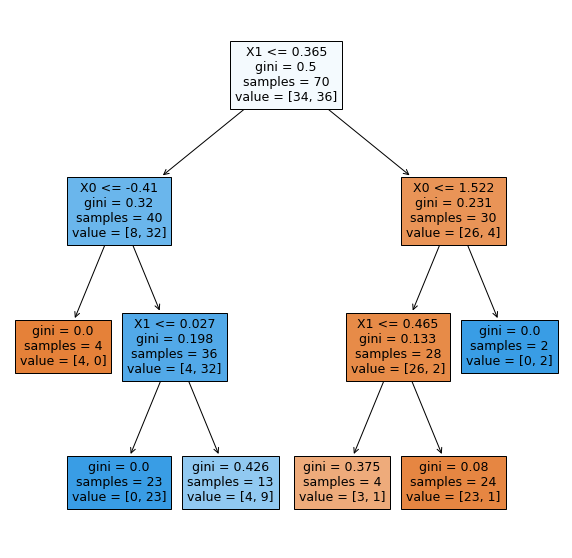

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_tree(tree, feature_names=['X0', 'X1'], filled=True)
plt.show()

In [9]:
print('Training set score: {:.3f}'.format(tree.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(tree.score(X_test, y_test)))

Training set score: 0.914
Test set score: 0.867


## 2. ランダムフォレスト

In [10]:
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

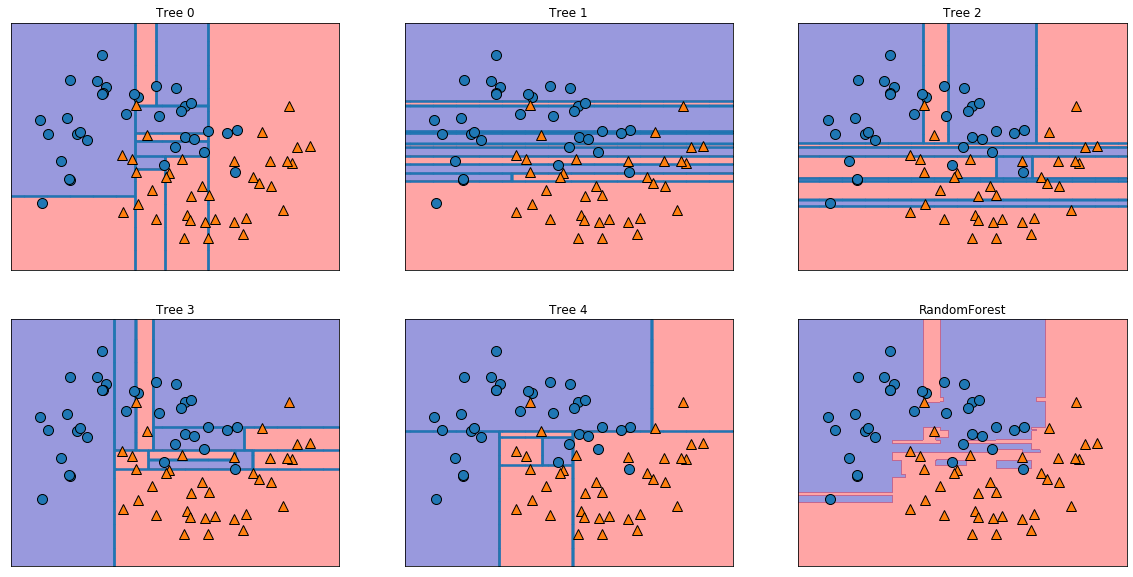

In [11]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title('Tree {}'.format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title('RandomForest')
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [12]:
print('Training set score: {:.3f}'.format(forest.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(forest.score(X_test, y_test)))

Training set score: 0.971
Test set score: 0.900


## 3. 勾配ブースティング

In [13]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=3, learning_rate=0.01)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [14]:
print('Training set score: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(gbrt.score(X_test, y_test)))

Training set score: 0.943
Test set score: 0.933


結論として、パラメータの調整さえ正しくできれば、勾配ブースティングの汎化性能が最も高い。